In [1]:
#Importing requeried libiries 
from googleapiclient.discovery import build
from google.oauth2 import service_account
import pandas as pd
from datetime import date
import numpy as np

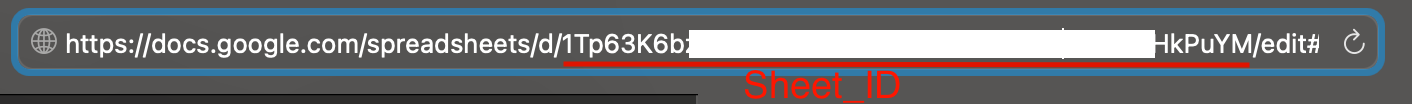

In [2]:
SHEET_ID = "" #Replace Sheet id of your sheet

# Geeting gkeys.json file
https://developers.google.com/sheets/api/guides/authorizing

Select your Project on Google Cloud Console
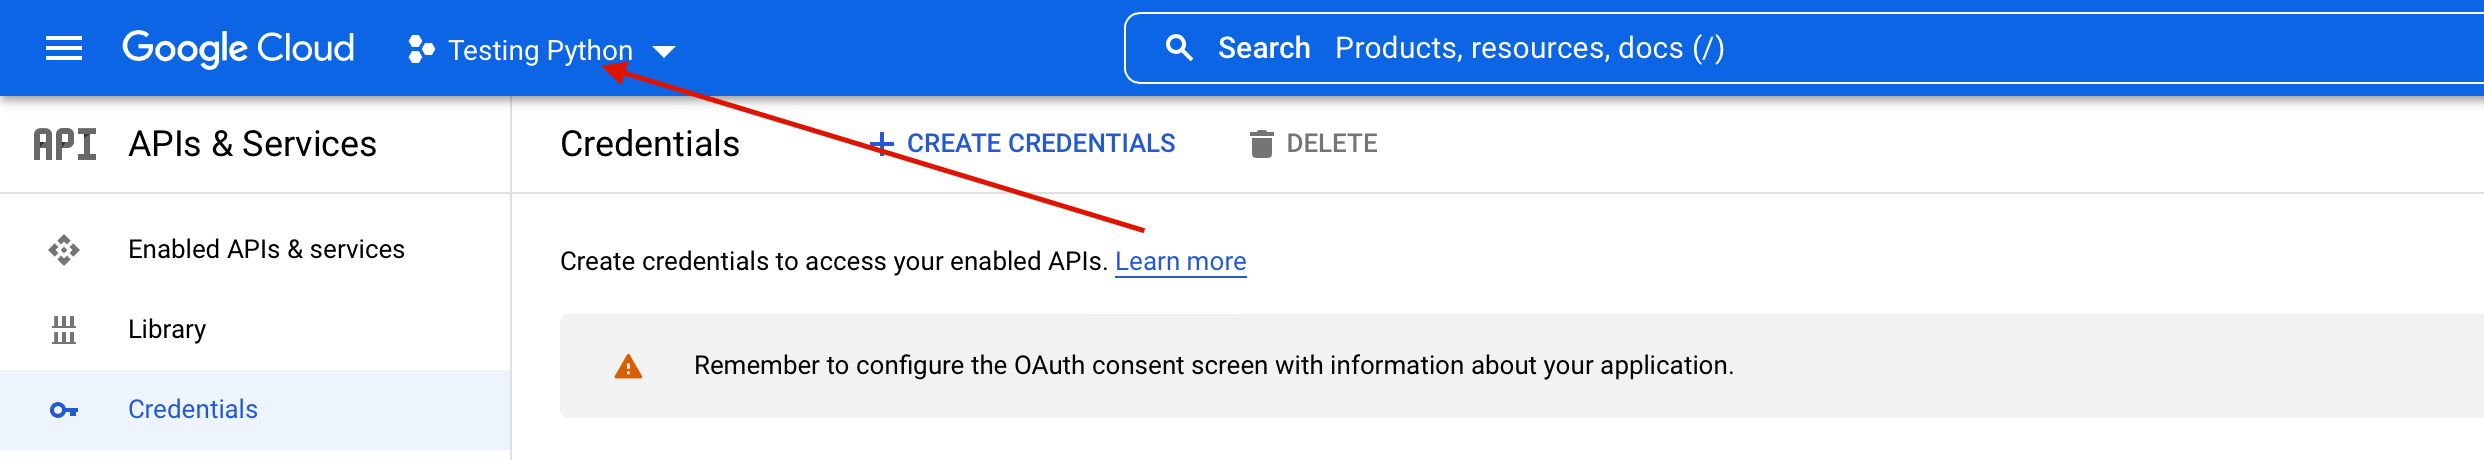

Then click create credentials and choose Service Account

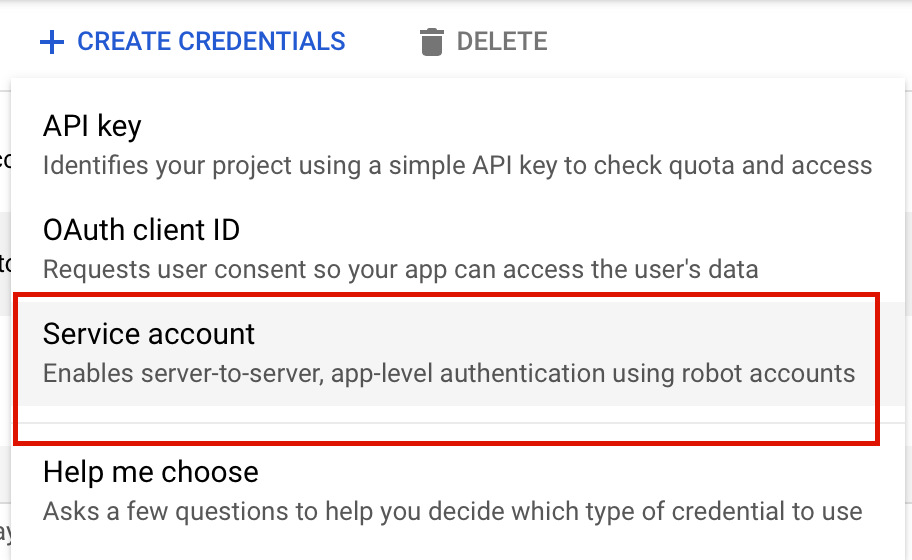

Enter Project Name and click create and continue
Select role as Editor
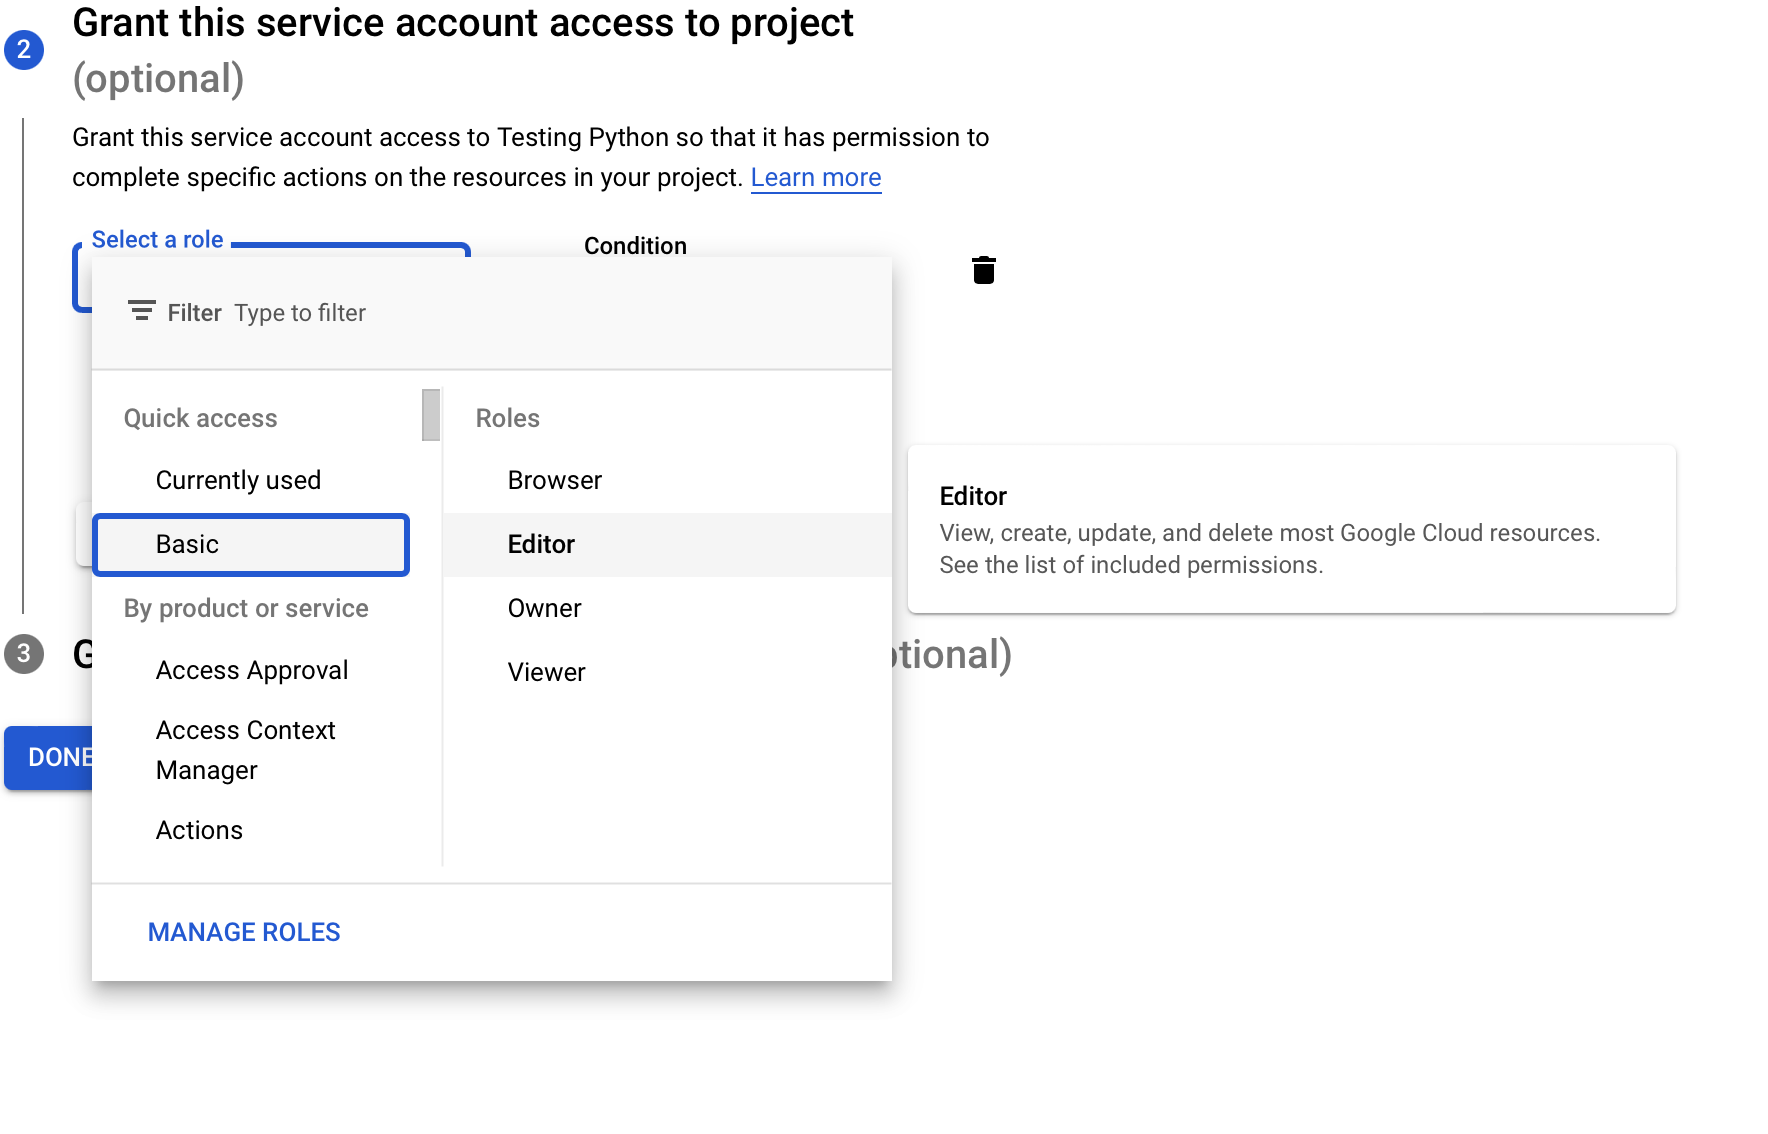

Select Service Account
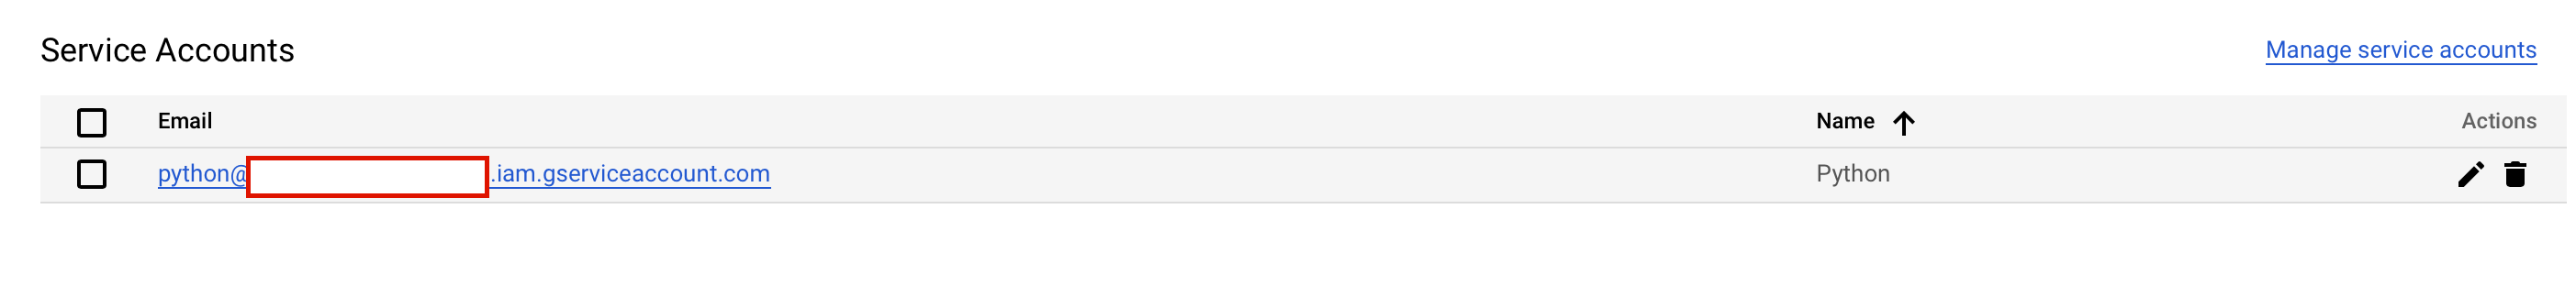

Goto Keys--> Add Key--> Create new Key --> Choose Json and download the file in same folder as the code
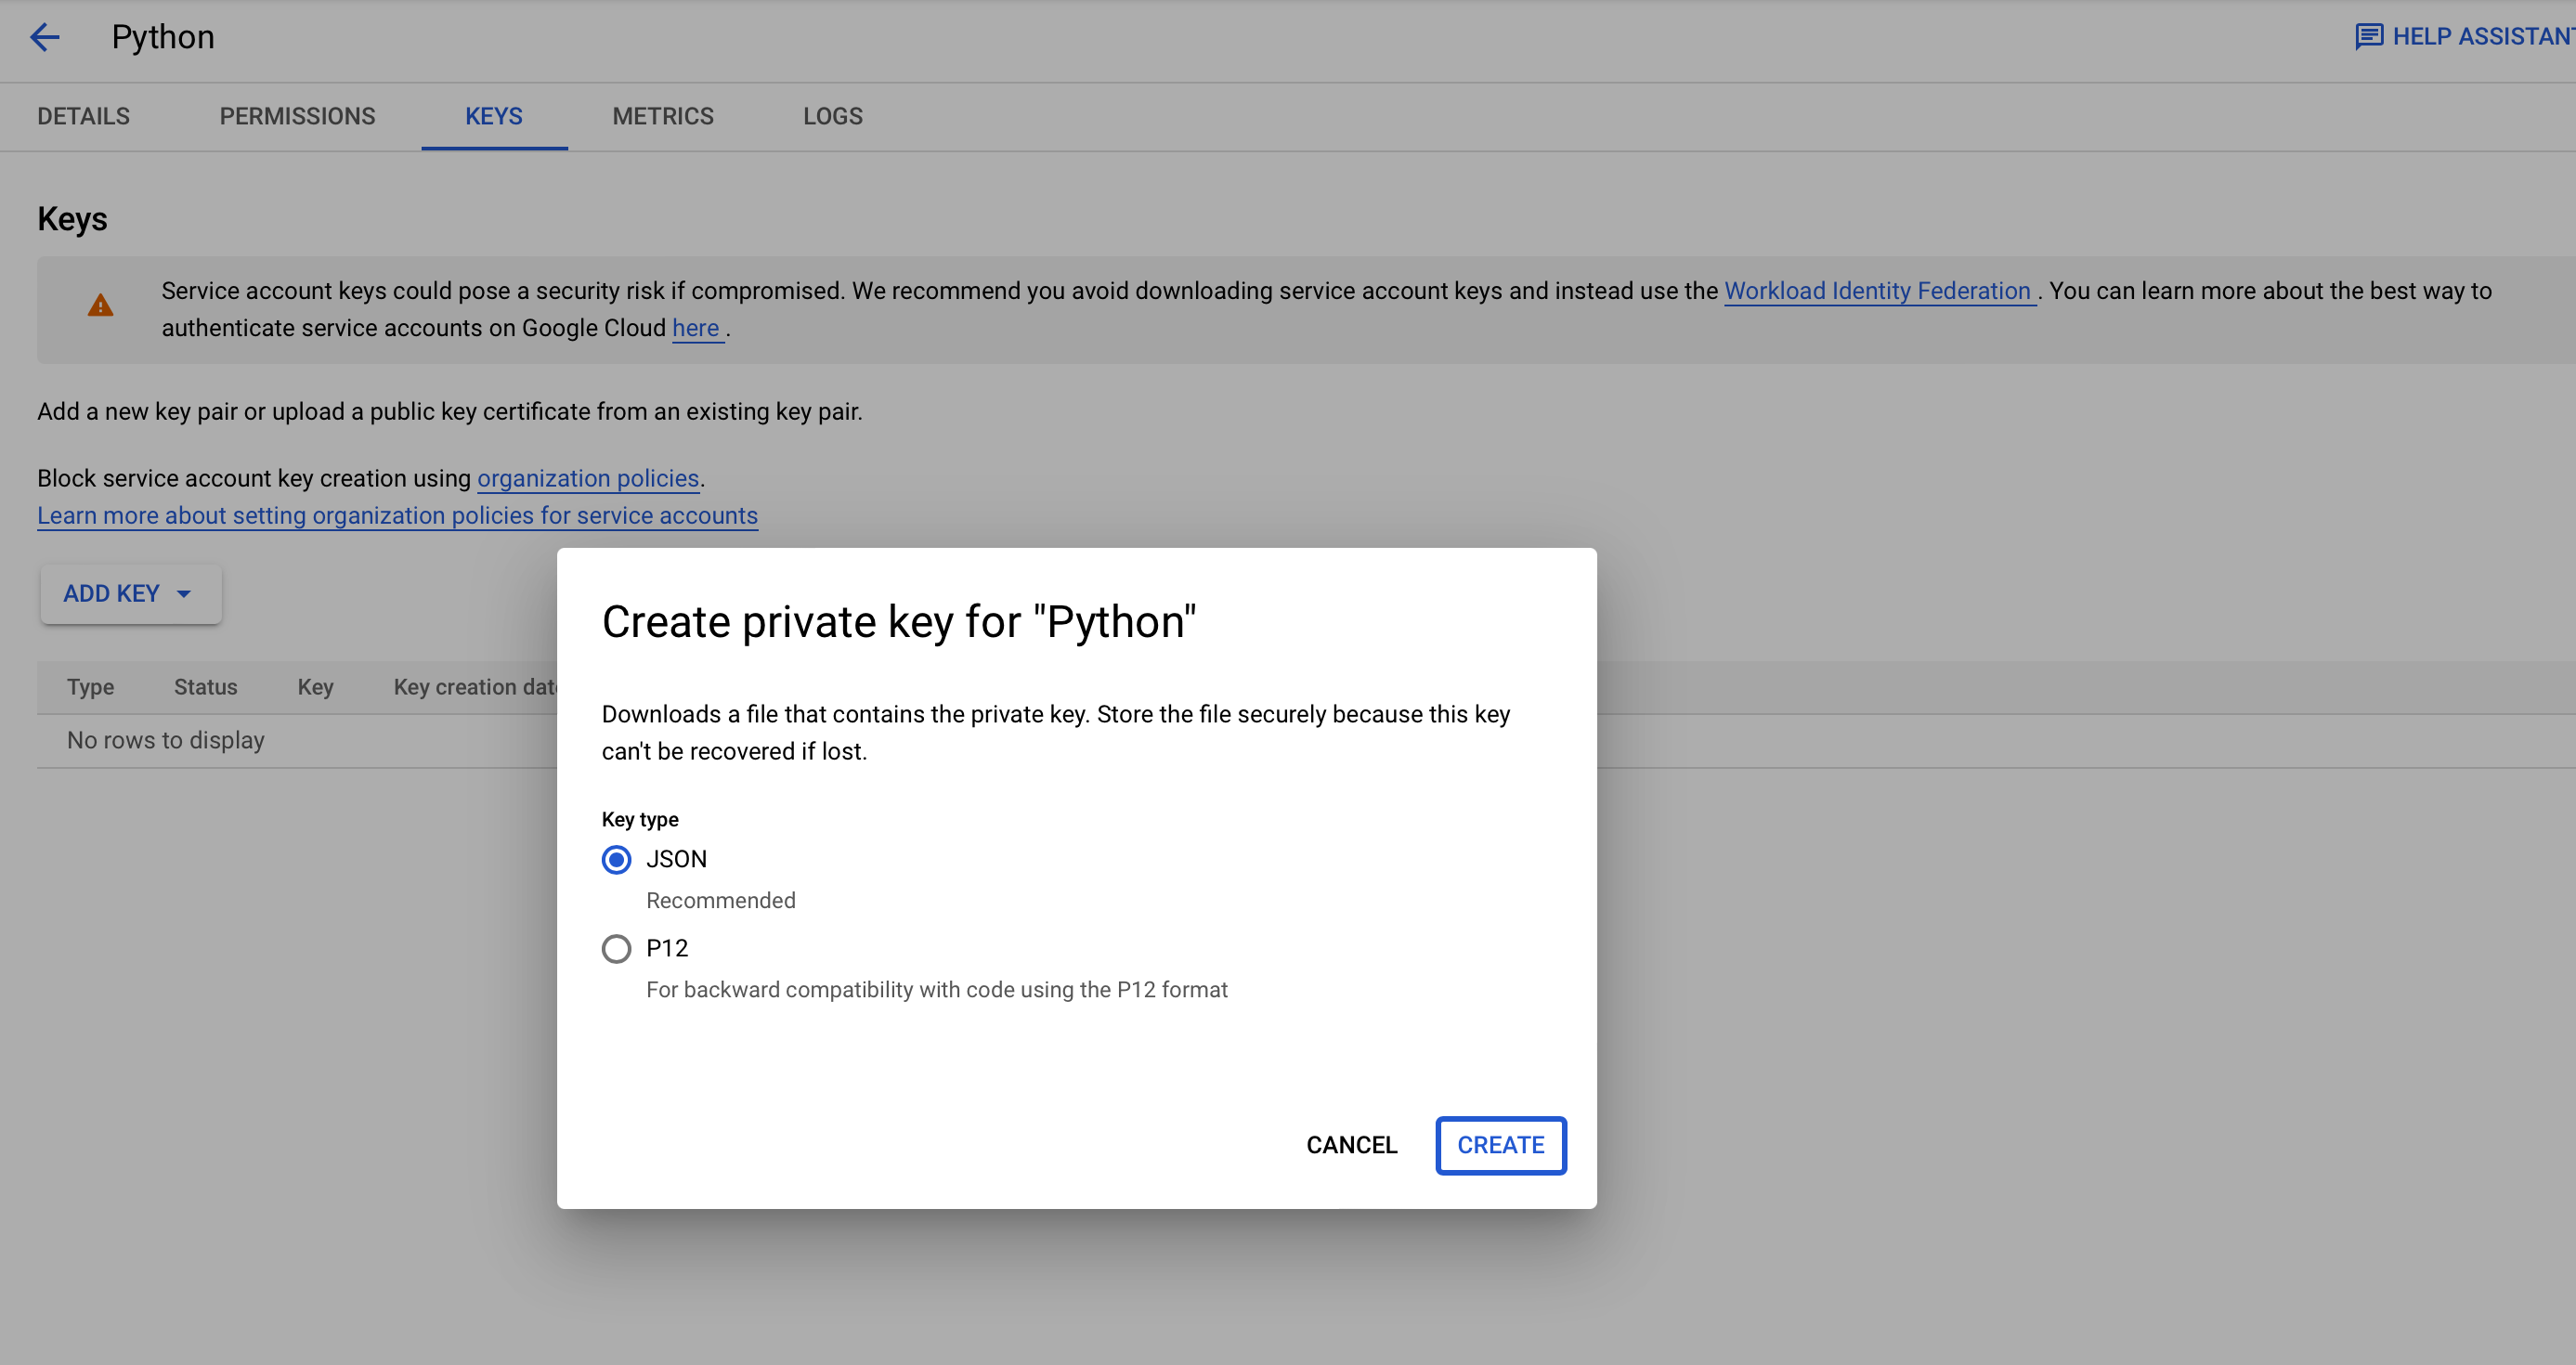

Share your google sheet on Email Id Create on Service Account to access it

Enable Api And Serices--> Go to Enabled APIs and Sevices--> Search Sheet Api and enable it
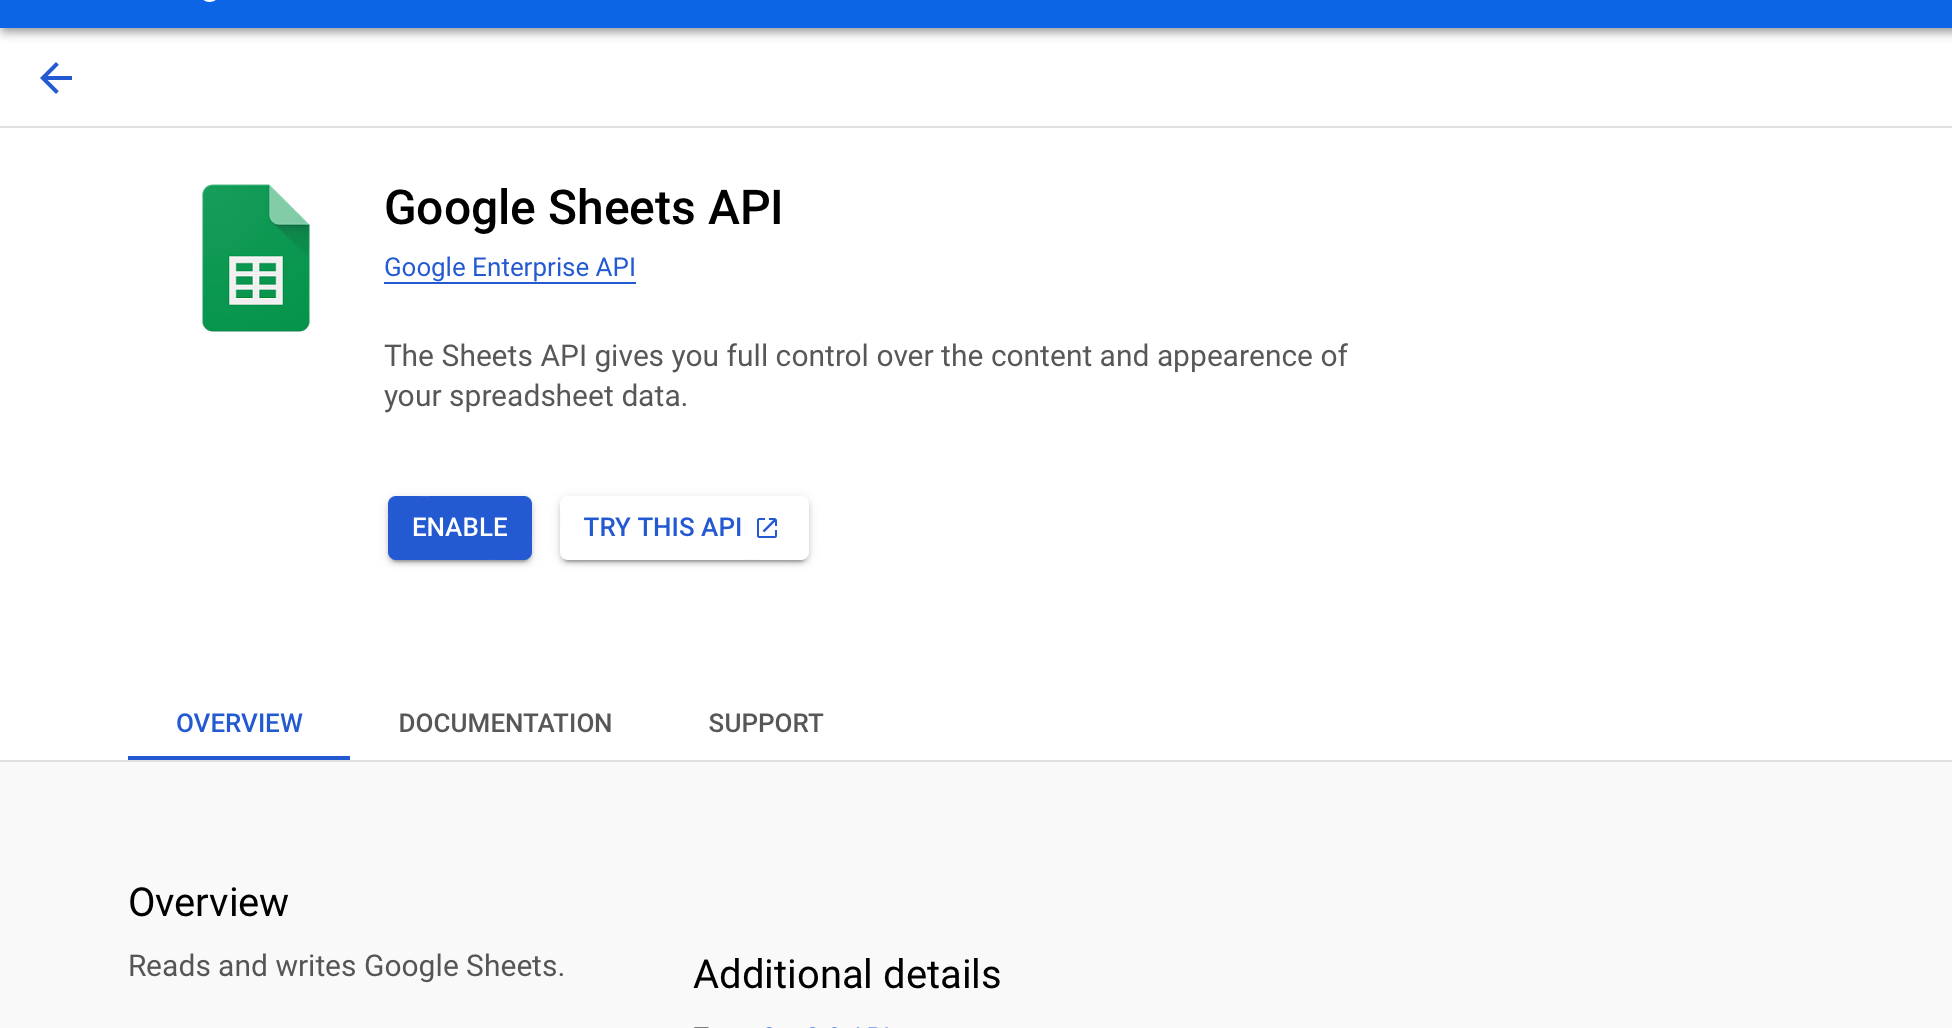

In [3]:
#accessing the Sheet credentials
SCOPES = ['https://www.googleapis.com/auth/spreadsheets']
SERVICE_ACCOUNT_FILE = 'gkeys.json'
credentials = None
credentials = service_account.Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
service = build('sheets', 'v4', credentials=credentials)
sheet = service.spreadsheets()

In [9]:
#Geeting demo details from csv
data = pd.read_csv("data.csv")
#replacing Nan Values
data = data.replace(np.nan, "")

In [10]:
#geeting result from Google Sheet
result = sheet.values().get(spreadsheetId=SHEET_ID, range="Sheet1!A:E").execute()#add your range from Sheet

In [11]:
#list of all the values
values = result.get('values', [])
print(values)

[['Name', 'Age']]


In [12]:
#Appending Data
request = sheet.values().append(spreadsheetId=SHEET_ID,
                                range="Sheet1!A"+str(len(values)+1), 
                                    valueInputOption = "RAW",
                                    insertDataOption="INSERT_ROWS",
                                    body={"values":data.values.tolist()}).execute()
print(request)

{'spreadsheetId': '1Tp63K6bzlhEwg7FGsYX73EX8kfDwUIcSdb8MYHkPuYM', 'updates': {'spreadsheetId': '1Tp63K6bzlhEwg7FGsYX73EX8kfDwUIcSdb8MYHkPuYM', 'updatedRange': 'Sheet1!A2:G4', 'updatedRows': 3, 'updatedColumns': 7, 'updatedCells': 21}}


#Final Sheet
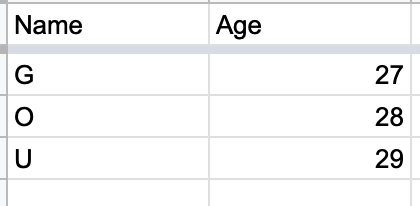